## **Problem 1:**
A healthy child’s systolic blood pressure p (in millimeters of mercury) and weight w (in pounds) are approximately related by the equation,

$$p = \beta_0 + \beta_1 \log(w)$$

Hint: consider $x = \log(w)$

Use the following experimental data to estimate the systolic blood pressure of a healthy child weighing 100 pounds.

<table>
  <tr>
    <td>w</td>
    <td>44</td>
    <td>61</td>
    <td>81</td>
    <td>113</td>
    <td>131</td>
  </tr>

  <tr>
    <td>p</td>
    <td>91</td>
    <td>98</td>
    <td>103</td>
    <td>110</td>
    <td>112</td>
  </tr>
</table>

In [32]:
import numpy as np

In [4]:
# write your code here
w = np.array([44, 61, 81, 113, 131])
p = np.array([91, 98, 103, 110, 112])

In [9]:
b2 = np.log(w)

In [12]:
a = b2
b = p

avg_a = np.sum(a)/a.size
avg_b = np.sum(b)/b.size

a_demean = a - avg_a 
b_demean = b - avg_b

b1 = np.sum(a_demean * b_demean) / np.sum(a_demean ** 2)
b0 = avg_b - b1 * avg_a

weight = 100
estimated_pressure = b0 + b1 * np.log(weight)

print(f"Estimated BP for {weight} pounds: {estimated_pressure}")

Estimated BP for 100 pounds: 107.1955607358525


## **Problem 2:**

In this assignment, you will implement linear regression (without using `np.polyfit`) and apply it to the [Assignment 4 Dataset](https://docs.google.com/spreadsheets/d/17dWB3kwgzPXRIeuS5YtrbdRHnpSzdH3m/edit?usp=sharing&ouid=101114531299819009465&rtpof=true&sd=true). The dataset contains two columns, the first column is the feature and the second column is the label. The goal is find the best fit line for the data.

Use `pd.read_excel()` to read the file and make prediction of rainfall based on the average precipitation for past 10 days. Compare the $r^2$ value obtained from the linear regression with that obtained through quadratic regression (Hint: use `np.polyfit`)



In [46]:
# write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("rainfall_data.xlsx")

c = data.iloc[:, 0]
d = data.iloc[:, 1]

In [38]:
m, b = np.polyfit(c, d, 1)
lin_reg = m * c + b

In [43]:
res = d - lin_reg
ssr = np.sum(res**2)
sst = np.sum((d - np.mean(d))**2)
r2_lin = 1 - (ssr / sst)

In [41]:
p, q, r, s = np.polyfit(c, d, 3)
quad_reg = p * c**3 + q * c**2 + r * c + s

In [44]:
res_q = d - quad_reg
ssr_q = np.sum(res_q**2)
r2_quad = 1 - (ssr_q / sst)

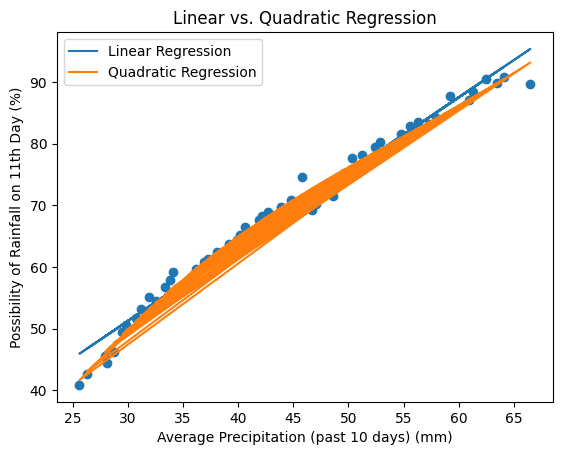

In [48]:
plt.scatter(c, d)
plt.plot(c, lin_reg, label='Linear Regression')
plt.plot(c, quad_reg, label='Quadratic Regression')
plt.legend()
plt.xlabel('Average Precipitation (past 10 days) (mm)')
plt.ylabel('Possibility of Rainfall on 11th Day (%)')
plt.title('Linear vs. Quadratic Regression')
plt.show()

In [49]:
print('R-squared value for linear regression:', r2_lin)
print('R-squared value for quadratic regression:', r2_quad)

R-squared value for linear regression: 0.9774714628301312
R-squared value for quadratic regression: 0.9895830859058443
